In [1]:
import pandas as pd

annoy_df = pd.read_csv('../results/index-size/gist-ann.csv')
hnsw_df = pd.read_csv('../results/index-size/gist-hnsw.csv')

size = 1920000.128

annoy_df['size']  = annoy_df['size'] - size
hnsw_df['size'] = hnsw_df['size'] - size

annoy_df['method'] = "annoy"
hnsw_df['method'] = "hnsw"

In [2]:
annoy_df.tail()

,recall,size,tree_nums,method
10,0.62939,590835.77825,110,annoy
11,0.62883,647591.27825,120,annoy
12,0.64425,704708.27825,130,annoy
13,0.66107,761765.02825,140,annoy
14,0.68635,818987.46575,150,annoy


In [3]:
hnsw_df.tail(11)

,recall,size,M,method
4,0.68260,150347.905203,48,hnsw
5,0.71636,181598.780203,56,hnsw
6,0.72263,212842.455984,64,hnsw
7,0.74420,244081.018484,72,hnsw
8,0.75434,275324.768484,80,hnsw
9,0.75520,306557.143484,88,hnsw
10,0.77142,337805.705984,96,hnsw
11,0.77901,369063.112234,104,hnsw
12,0.78006,400308.955984,112,hnsw
13,0.78769,431566.955984,120,hnsw


In [4]:
cols = ['method', 'size', 'recall']

df = pd.concat([annoy_df[cols].tail(11), hnsw_df[cols].tail(10)])
df.tail(10)

,method,size,recall
5,hnsw,181598.780203,0.71636
6,hnsw,212842.455984,0.72263
7,hnsw,244081.018484,0.74420
8,hnsw,275324.768484,0.75434
9,hnsw,306557.143484,0.75520
10,hnsw,337805.705984,0.77142
11,hnsw,369063.112234,0.77901
12,hnsw,400308.955984,0.78006
13,hnsw,431566.955984,0.78769
14,hnsw,462825.455984,0.79345


<Axes: xlabel='recall', ylabel='size'>

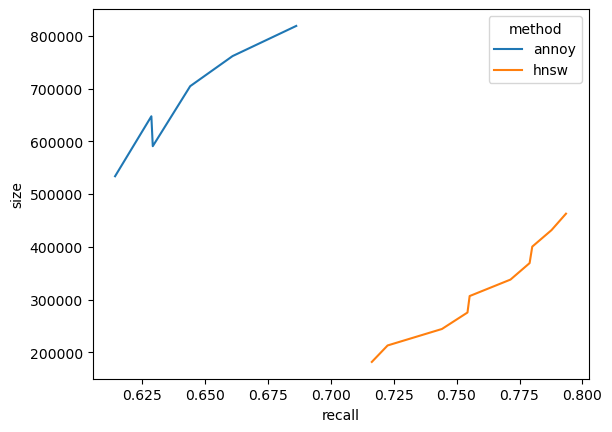

In [9]:
import seaborn as sns

sns.lineplot(data=df.query('recall > 0.6'), x="recall", y="size", hue="method")

In [6]:
annoy_df.iloc[10]

recall            0.62939
size         590835.77825
tree_nums             110
method              annoy
Name: 10, dtype: object

<Axes: xlabel='method', ylabel='size'>

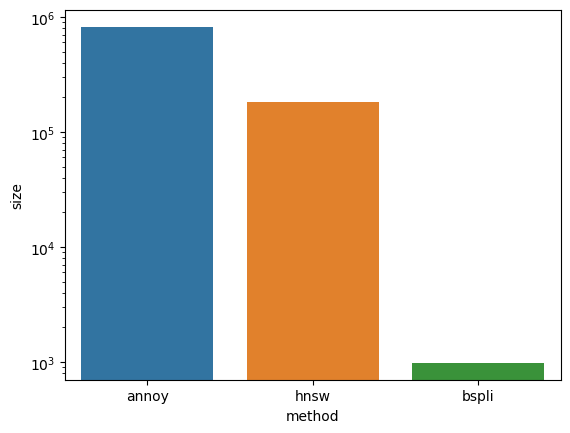

In [8]:
size_df = pd.DataFrame(data={
    'method': ['annoy', 'hnsw', 'bspli'],
    'size': [818987.46575, 181598.780203, 981.347 ]
})

sns.barplot(data=size_df, x="method", y="size", log=True)